# Machine Learning Bootcamp

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UVADS/DS-3001/blob/main/05_ML_Concepts_II_Data_Prep/ml_bootcamp.ipynb)

In [6]:
# Imports
import pandas as pd
import numpy as np 
#make sure to install sklearn in your terminal first!
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Phase I

### Working to develop a model than can predict cereal quality rating...

-What is the target variable?

-Assuming we are able to optimize and make recommendations 
how does this translate into a business context? 

-Prediction problem: Classification or Regression?

-Independent Business Metric: Assuming that higher ratings results in higher sales, can we predict which new cereals that enter the market over the next year will perform the best?

## Phase II

### Scale/Center/Normalizing/Variable Classes

In [7]:
#read in the cereal dataset, you should have this locally or you can use the URL linking to the class repo below
cereal = pd.read_csv("https://raw.githubusercontent.com/UVADS/DS-3001/main/data/cereal.csv")

cereal.info() # Let's check the structure of the dataset and see if we have any issues with variable classes
#usually it's converting things to category


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [8]:
#Looks like columns 1,2,11 and 12 need to be converted to category

Column_index_list = [1,2,11,12]
cereal.iloc[:,Column_index_list]= cereal.iloc[:,Column_index_list].astype('category') 
#iloc accesses the index of a dataframe, bypassing having to manually type in the names of each column

cereal.dtypes #another way of checking the structure of the dataset. Simpler, but does not give an index

/var/folders/9j/yx6x8t1j43n74jfsyt6sky700000gn/T/ipykernel_49376/3417620518.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cereal.iloc[:,Column_index_list]= cereal.iloc[:,Column_index_list].astype('category')


name          object
mfr         category
type        category
calories       int64
protein        int64
fat            int64
sodium         int64
fiber        float64
carbo        float64
sugars         int64
potass         int64
vitamins    category
shelf       category
weight       float64
cups         float64
rating       float64
dtype: object

In [9]:
#Let's take a closer look at mfr
cereal.mfr.value_counts() #value_counts() simply displays variable counts as a vertical table.

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [10]:
#Usually don't want more than 5 groups, so we should collapse this factor  
#Keep the large groups (G, K) and group all the smaller categories as "Other"

top = ['K','G']
cereal.mfr = (cereal.mfr.apply(lambda x: x if x in top else "Other")).astype('category')
#lambda is a small anonymous function that can take any number of arguments but can only have one expression
#a simple lambda function is lambda a: a+10, if we passed 5 to this we would get back 15
#lambda functions are best used inside of another function, like in this example when it is used inside the apply function
#to use an if function in a lambda statement, the True return value comes first (x), then the if statement, then else, and then the False return

cereal.mfr.value_counts() #This is a lot better

Other    32
K        23
G        22
Name: mfr, dtype: int64

In [11]:
cereal.type.value_counts() #looks good

C    74
H     3
Name: type, dtype: int64

In [12]:
cereal.vitamins.value_counts() #also good

25     63
0       8
100     6
Name: vitamins, dtype: int64

In [13]:
cereal.weight.value_counts() #what about this one? ... Not a categorical variable groupings so it does not matter right now

1.00    64
1.33     5
1.25     2
1.50     2
0.50     2
1.30     1
0.83     1
Name: weight, dtype: int64

### Scale/Center

In [14]:
#Centering and Standardizing Data
sodium_sc = StandardScaler().fit_transform(cereal[['sodium']])
#reshapes series into an appropriate argument for the function fit_transform: an array

sodium_sc[:10] #essentially taking the zscores of the data, here are the first 10 values

array([[-0.35630563],
       [-1.73708742],
       [ 1.20457813],
       [-0.23623765],
       [ 0.48417024],
       [ 0.24403427],
       [-0.41633962],
       [ 0.60423822],
       [ 0.48417024],
       [ 0.60423822]])

### Normalizing the numeric values 

In [15]:
#Let's look at min-max scaling, placing the numbers between 0 and 1. 
sodium_n = MinMaxScaler().fit_transform(cereal[['sodium']])
sodium_n[:10]

array([[0.40625 ],
       [0.046875],
       [0.8125  ],
       [0.4375  ],
       [0.625   ],
       [0.5625  ],
       [0.390625],
       [0.65625 ],
       [0.625   ],
       [0.65625 ]])

<Axes: ylabel='Density'>

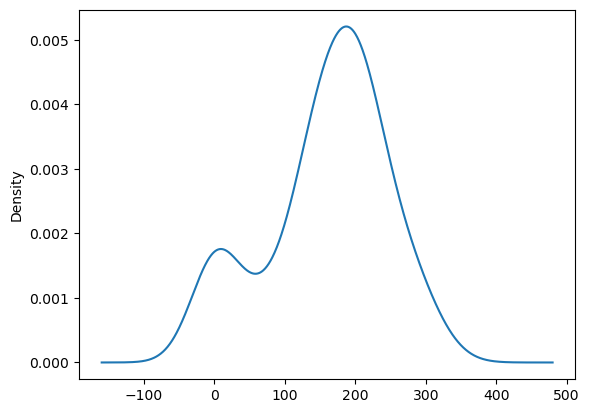

In [16]:
#Let's check just to be sure the relationships are the same
cereal.sodium.plot.density()

<Axes: ylabel='Density'>

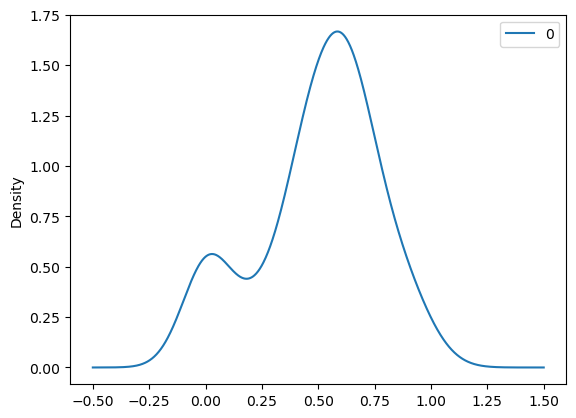

In [17]:
pd.DataFrame(sodium_n).plot.density() #Checks out!

In [18]:
#Now we can move forward in normalizing the numeric values and create a index based on numeric columns:
abc = list(cereal.select_dtypes('number')) #select function to find the numeric variables and create a list  

cereal[abc] = MinMaxScaler().fit_transform(cereal[abc])
cereal #notice the difference in the range of values for the numeric variables

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Other,C,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.848943,25,3,0.5,0.064,0.665593
1,100% Natural Bran,Other,C,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.410876,0,3,0.5,0.600,0.210685
2,All-Bran,K,C,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.969789,25,3,0.5,0.064,0.546941
3,All-Bran with Extra Fiber,K,C,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,25,3,0.5,0.200,1.000000
4,Almond Delight,Other,C,0.545455,0.2,0.4,0.625000,0.071429,0.625000,0.5625,0.000000,25,3,0.5,0.400,0.215987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,0.545455,0.2,0.2,0.781250,0.000000,0.916667,0.2500,0.184290,25,3,0.5,0.400,0.278387
73,Trix,G,C,0.545455,0.0,0.2,0.437500,0.000000,0.583333,0.8125,0.078550,25,2,0.5,0.600,0.128340
74,Wheat Chex,Other,C,0.454545,0.4,0.2,0.718750,0.214286,0.750000,0.2500,0.350453,25,1,0.5,0.336,0.419558
75,Wheaties,G,C,0.454545,0.4,0.2,0.625000,0.214286,0.750000,0.2500,0.335347,25,1,0.5,0.600,0.443410


### One-hot Encoding 

In [19]:
# Next let's one-hot encode those categorical variables

category_list = list(cereal.select_dtypes('category')) #select function to find the categorical variables and create a list  

cereal_1h = pd.get_dummies(cereal, columns = category_list) 
#get_dummies encodes categorical variables into binary by adding in indicator column for each group of a category 
#and assigning it 0 if false or 1 if true
cereal_1h #see the difference? This is one-hot encoding!

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,...,mfr_K,mfr_Other,type_C,type_H,vitamins_0,vitamins_25,vitamins_100,shelf_1,shelf_2,shelf_3
0,100% Bran,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.848943,0.5,...,0,1,1,0,0,1,0,0,0,1
1,100% Natural Bran,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.410876,0.5,...,0,1,1,0,1,0,0,0,0,1
2,All-Bran,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.969789,0.5,...,1,0,1,0,0,1,0,0,0,1
3,All-Bran with Extra Fiber,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,0.5,...,1,0,1,0,0,1,0,0,0,1
4,Almond Delight,0.545455,0.2,0.4,0.625000,0.071429,0.625000,0.5625,0.000000,0.5,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,0.545455,0.2,0.2,0.781250,0.000000,0.916667,0.2500,0.184290,0.5,...,0,0,1,0,0,1,0,0,0,1
73,Trix,0.545455,0.0,0.2,0.437500,0.000000,0.583333,0.8125,0.078550,0.5,...,0,0,1,0,0,1,0,0,1,0
74,Wheat Chex,0.454545,0.4,0.2,0.718750,0.214286,0.750000,0.2500,0.350453,0.5,...,0,1,1,0,0,1,0,1,0,0
75,Wheaties,0.454545,0.4,0.2,0.625000,0.214286,0.750000,0.2500,0.335347,0.5,...,0,0,1,0,0,1,0,1,0,0


### Baseline/Prevalance 

count    77.000000
mean      0.325432
std       0.185658
min       0.000000
25%       0.199985
50%       0.295490
75%       0.433315
max       1.000000
Name: rating, dtype: float64

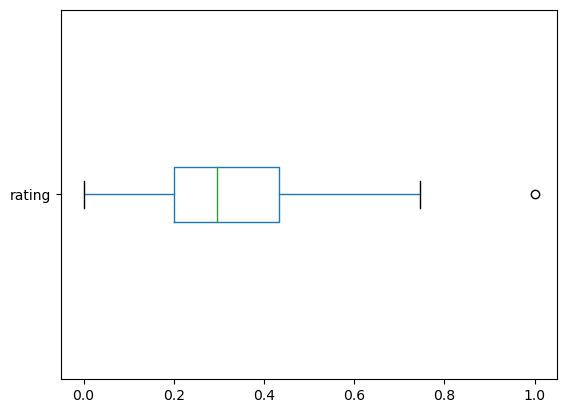

In [20]:
#This is essentially the target to which we are trying to out perform with our model. Percentage is represented by the positive class. 
#Rating is continuous, but we are going to turn it into a Boolean to be used for classification by selecting the top quartile of values.

cereal_1h.boxplot(column= 'rating', vert= False, grid=False)
cereal_1h.rating.describe() #notice the upper quartile of values will be above 0.43 

In [ ]:
#add this as a predictor instead of replacing the numeric version
 #notice the new column rating_f, it is now binary based
 cereal_1h['rating_f'] = pd.cut(cereal_1h.rating, bins = [-1,0.43,1], labels =[0,1])
#If we want two segments we input three numbers, start, cut and stop values

cereal_1h #on if the continuous value is above 0.43 or not

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,...,mfr_Other,type_C,type_H,vitamins_0,vitamins_25,vitamins_100,shelf_1,shelf_2,shelf_3,rating_f
0,100% Bran,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.848943,0.5,...,1,1,0,0,1,0,0,0,1,1
1,100% Natural Bran,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.410876,0.5,...,1,1,0,1,0,0,0,0,1,0
2,All-Bran,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.969789,0.5,...,0,1,0,0,1,0,0,0,1,1
3,All-Bran with Extra Fiber,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,0.5,...,0,1,0,0,1,0,0,0,1,1
4,Almond Delight,0.545455,0.2,0.4,0.625000,0.071429,0.625000,0.5625,0.000000,0.5,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,0.545455,0.2,0.2,0.781250,0.000000,0.916667,0.2500,0.184290,0.5,...,0,1,0,0,1,0,0,0,1,0
73,Trix,0.545455,0.0,0.2,0.437500,0.000000,0.583333,0.8125,0.078550,0.5,...,0,1,0,0,1,0,0,1,0,0
74,Wheat Chex,0.454545,0.4,0.2,0.718750,0.214286,0.750000,0.2500,0.350453,0.5,...,1,1,0,0,1,0,1,0,0,0
75,Wheaties,0.454545,0.4,0.2,0.625000,0.214286,0.750000,0.2500,0.335347,0.5,...,0,1,0,0,1,0,1,0,0,1


In [22]:
#So now let's check the prevalence 
prevalence = cereal_1h.rating_f.value_counts()[1]/len(cereal_1h.rating_f)
#value_count()[1] pulls the count of '1' values in the column (values above .43)

prevalence #gives percent of values above .43 which is equivalent to the prevalence or our baseline

0.2727272727272727

In [23]:
#let's just double check this
print(cereal_1h.rating_f.value_counts())
print(21/(21+56)) #looks good!

0    56
1    21
Name: rating_f, dtype: int64
0.2727272727272727


### Dropping Variables and Partitioning   

In [24]:
#Divide up our data into three parts, Training, Tuning, and Test but first we need to...
#clean up our dataset a bit by dropping the original rating variable and the cereal name since we can't really use them

cereal_dt = cereal_1h.drop(['name','rating'],axis=1) #creating a new dataframe so we don't delete these columns from our working environment. 
cereal_dt

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups,...,mfr_Other,type_C,type_H,vitamins_0,vitamins_25,vitamins_100,shelf_1,shelf_2,shelf_3,rating_f
0,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.848943,0.5,0.064,...,1,1,0,0,1,0,0,0,1,1
1,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.410876,0.5,0.600,...,1,1,0,1,0,0,0,0,1,0
2,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.969789,0.5,0.064,...,0,1,0,0,1,0,0,0,1,1
3,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,0.5,0.200,...,0,1,0,0,1,0,0,0,1,1
4,0.545455,0.2,0.4,0.625000,0.071429,0.625000,0.5625,0.000000,0.5,0.400,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.545455,0.2,0.2,0.781250,0.000000,0.916667,0.2500,0.184290,0.5,0.400,...,0,1,0,0,1,0,0,0,1,0
73,0.545455,0.0,0.2,0.437500,0.000000,0.583333,0.8125,0.078550,0.5,0.600,...,0,1,0,0,1,0,0,1,0,0
74,0.454545,0.4,0.2,0.718750,0.214286,0.750000,0.2500,0.350453,0.5,0.336,...,1,1,0,0,1,0,1,0,0,0
75,0.454545,0.4,0.2,0.625000,0.214286,0.750000,0.2500,0.335347,0.5,0.600,...,0,1,0,0,1,0,1,0,0,1


In [25]:
# Now we partition
Train, Test = train_test_split(cereal_dt,  train_size = 55, stratify = cereal_dt.rating_f) 
#stratify perserves class proportions when splitting, reducing sampling error 

In [26]:
print(Train.shape)
print(Test.shape)

(55, 22)
(22, 22)


In [27]:
#Now we need to use the function again to create the tuning set
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.rating_f)

In [28]:
#check the prevalance in all groups, they should be all equivalent in order to eventually build an accurate model
print(Train.rating_f.value_counts())
print(15/(40+15))

0    40
1    15
Name: rating_f, dtype: int64
0.2727272727272727


In [29]:
print(Tune.rating_f.value_counts())
print(3/(8+3)) #good

0    8
1    3
Name: rating_f, dtype: int64
0.2727272727272727


In [30]:
print(Test.rating_f.value_counts())
print(3/(8+3)) #same as above, good job!

0    8
1    3
Name: rating_f, dtype: int64
0.2727272727272727


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

# Initialize the DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred_dtree = dtree.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred_dtree)

print(f'Precision: {precision}')

NameError: name 'X_train' is not defined

# Now you try!

In [33]:
job = pd.read_csv("https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv")
job.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Question 1: What is the relationship between academic achievement and salary?

Individual Business Metric: Assuming that higher academic performance correlates with higher salaries, can we predict which students will earn above the median starting salary?

In [34]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [35]:
col_to_cat = [1,3,5, 6, 8, 9, 11, 13]
job.iloc[:,col_to_cat]= job.iloc[:,col_to_cat].astype('category') 
#iloc accesses the index of a dataframe, bypassing having to manually type in the names of each column

job.dtypes

/var/folders/9j/yx6x8t1j43n74jfsyt6sky700000gn/T/ipykernel_49376/3901436007.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  job.iloc[:,col_to_cat]= job.iloc[:,col_to_cat].astype('category')


sl_no                int64
gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
salary             float64
dtype: object

In [46]:
continuous_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply MinMax scaling to selected columns
job[continuous_vars] = scaler.fit_transform(job[continuous_vars])

# Check the first few rows
job.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,0.538240,Others,0.889621,Others,Commerce,0.195122,Sci&Tech,No,0.104167,Mkt&HR,0.284483,Placed,0.094595
1,2,M,0.792414,Central,0.680890,Others,Science,0.670244,Sci&Tech,Yes,0.760417,Mkt&Fin,0.564843,Placed,0.000000
2,3,M,0.497011,Central,0.510708,Central,Arts,0.341463,Comm&Mgmt,No,0.520833,Mkt&Fin,0.247001,Placed,0.067568
3,4,M,0.311482,Central,0.247117,Central,Science,0.048780,Sci&Tech,No,0.333333,Mkt&HR,0.308096,Not Placed,NaN
4,5,M,0.925788,Central,0.602965,Central,Commerce,0.568293,Comm&Mgmt,No,0.975000,Mkt&Fin,0.160795,Placed,0.304054


In [50]:
#Now we can move forward in normalizing the numeric values and create a index based on numeric columns:
abc = list(job.select_dtypes('number')) #select function to find the numeric variables and create a list  

job[abc] = MinMaxScaler().fit_transform(job[abc])
job #notice the difference in the range of values for the numeric variables

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0.000000,M,0.538240,Others,0.889621,Others,Commerce,0.195122,Sci&Tech,No,0.104167,Mkt&HR,0.284483,Placed,0.094595
1,0.004673,M,0.792414,Central,0.680890,Others,Science,0.670244,Sci&Tech,Yes,0.760417,Mkt&Fin,0.564843,Placed,0.000000
2,0.009346,M,0.497011,Central,0.510708,Central,Arts,0.341463,Comm&Mgmt,No,0.520833,Mkt&Fin,0.247001,Placed,0.067568
3,0.014019,M,0.311482,Central,0.247117,Central,Science,0.048780,Sci&Tech,No,0.333333,Mkt&HR,0.308096,Not Placed,NaN
4,0.018692,M,0.925788,Central,0.602965,Central,Commerce,0.568293,Comm&Mgmt,No,0.975000,Mkt&Fin,0.160795,Placed,0.304054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.981308,M,0.818594,Others,0.741351,Others,Commerce,0.673171,Comm&Mgmt,No,0.854167,Mkt&Fin,0.872564,Placed,0.270270
211,0.985981,M,0.352711,Others,0.378913,Others,Science,0.536585,Sci&Tech,No,0.500000,Mkt&Fin,0.090330,Placed,0.101351
212,0.990654,M,0.538240,Others,0.494234,Others,Commerce,0.560976,Comm&Mgmt,Yes,0.187500,Mkt&Fin,0.693778,Placed,0.128378
213,0.995327,F,0.682540,Others,0.477759,Others,Commerce,0.195122,Comm&Mgmt,No,0.416667,Mkt&HR,0.338081,Placed,0.005405


In [51]:
category_list = list(job.select_dtypes('category')) #select function to find the categorical variables and create a list  

job_1h = pd.get_dummies(job, columns = category_list) 
#get_dummies encodes categorical variables into binary by adding in indicator column for each group of a category 
#and assigning it 0 if false or 1 if true
job_1h #see the difference? This is one-hot encoding!

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,0.000000,0.538240,0.889621,0.195122,0.104167,0.284483,0.094595,0,1,0,...,0,0,0,1,1,0,0,1,0,1
1,0.004673,0.792414,0.680890,0.670244,0.760417,0.564843,0.000000,0,1,1,...,1,0,0,1,0,1,1,0,0,1
2,0.009346,0.497011,0.510708,0.341463,0.520833,0.247001,0.067568,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,0.014019,0.311482,0.247117,0.048780,0.333333,0.308096,NaN,0,1,1,...,1,0,0,1,1,0,0,1,1,0
4,0.018692,0.925788,0.602965,0.568293,0.975000,0.160795,0.304054,0,1,1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.981308,0.818594,0.741351,0.673171,0.854167,0.872564,0.270270,0,1,0,...,0,1,0,0,1,0,1,0,0,1
211,0.985981,0.352711,0.378913,0.536585,0.500000,0.090330,0.101351,0,1,0,...,1,0,0,1,1,0,1,0,0,1
212,0.990654,0.538240,0.494234,0.560976,0.187500,0.693778,0.128378,0,1,0,...,0,1,0,0,0,1,1,0,0,1
213,0.995327,0.682540,0.477759,0.195122,0.416667,0.338081,0.005405,1,0,0,...,0,1,0,0,1,0,0,1,0,1


count    215.000000
mean       0.399273
std        0.179482
min        0.000000
25%        0.268293
50%        0.390244
75%        0.536585
max        1.000000
Name: degree_p, dtype: float64

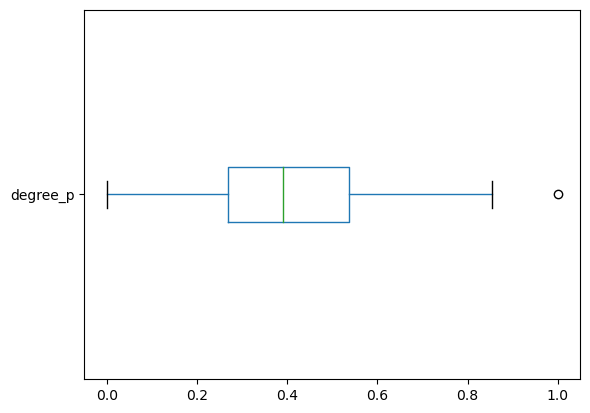

In [52]:
job_1h.boxplot(column= 'degree_p', vert= False, grid=False)
job_1h.degree_p.describe()

count    148.000000
mean       0.119805
std        0.126294
min        0.000000
25%        0.054054
50%        0.087838
75%        0.135135
max        1.000000
Name: salary, dtype: float64

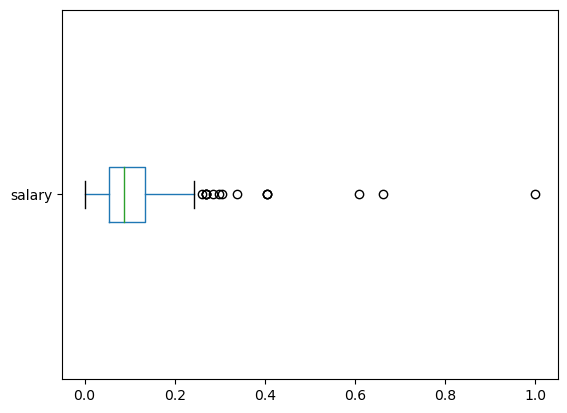

In [80]:
job_1h.boxplot(column= 'salary', vert= False, grid=False)
job_1h.salary.describe()

In [54]:
job_1h['degree_p_f'] = pd.cut(job_1h.degree_p, bins = [-1,0.54,1], labels =[0,1])
job_1h

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed,degree_p_f
0,0.000000,0.538240,0.889621,0.195122,0.104167,0.284483,0.094595,0,1,0,...,0,0,1,1,0,0,1,0,1,0
1,0.004673,0.792414,0.680890,0.670244,0.760417,0.564843,0.000000,0,1,1,...,0,0,1,0,1,1,0,0,1,1
2,0.009346,0.497011,0.510708,0.341463,0.520833,0.247001,0.067568,0,1,1,...,1,0,0,1,0,1,0,0,1,0
3,0.014019,0.311482,0.247117,0.048780,0.333333,0.308096,NaN,0,1,1,...,0,0,1,1,0,0,1,1,0,0
4,0.018692,0.925788,0.602965,0.568293,0.975000,0.160795,0.304054,0,1,1,...,1,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.981308,0.818594,0.741351,0.673171,0.854167,0.872564,0.270270,0,1,0,...,1,0,0,1,0,1,0,0,1,1
211,0.985981,0.352711,0.378913,0.536585,0.500000,0.090330,0.101351,0,1,0,...,0,0,1,1,0,1,0,0,1,0
212,0.990654,0.538240,0.494234,0.560976,0.187500,0.693778,0.128378,0,1,0,...,1,0,0,0,1,1,0,0,1,1
213,0.995327,0.682540,0.477759,0.195122,0.416667,0.338081,0.005405,1,0,0,...,1,0,0,1,0,0,1,0,1,0


In [89]:
job_1h['salary_f'] = pd.cut(job_1h.salary_f, bins = [-1,0.087,1], labels =[0,1])
job_1h

AttributeError: 'DataFrame' object has no attribute 'salary_f'

In [56]:
prevalence = job_1h.degree_p_f.value_counts()[1]/len(job_1h.degree_p_f)
prevalence

0.2

In [85]:
prevalence = job_1h.salary.value_counts()[1]/len(job_1h.salary)
prevalence

0.3488372093023256

In [58]:
#let's just double check this
print(job_1h.degree_p_f.value_counts())
print(43/(43+172)) #looks good!

0    172
1     43
Name: degree_p_f, dtype: int64
0.2


In [88]:
print(job_1h.salary.value_counts())
print(75/(75+73))

1    75
0    73
Name: salary, dtype: int64
0.5067567567567568


In [59]:
job_dt = job_1h.drop(['sl_no','degree_p'],axis=1) #creating a new dataframe so we don't delete these columns from our working environment. 
job_dt

,ssc_p,hsc_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed,degree_p_f
0,0.538240,0.889621,0.104167,0.284483,0.094595,0,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0
1,0.792414,0.680890,0.760417,0.564843,0.000000,0,1,1,0,0,...,0,0,1,0,1,1,0,0,1,1
2,0.497011,0.510708,0.520833,0.247001,0.067568,0,1,1,0,1,...,1,0,0,1,0,1,0,0,1,0
3,0.311482,0.247117,0.333333,0.308096,NaN,0,1,1,0,1,...,0,0,1,1,0,0,1,1,0,0
4,0.925788,0.602965,0.975000,0.160795,0.304054,0,1,1,0,1,...,1,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.818594,0.741351,0.854167,0.872564,0.270270,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,1
211,0.352711,0.378913,0.500000,0.090330,0.101351,0,1,0,1,0,...,0,0,1,1,0,1,0,0,1,0
212,0.538240,0.494234,0.187500,0.693778,0.128378,0,1,0,1,0,...,1,0,0,0,1,1,0,0,1,1
213,0.682540,0.477759,0.416667,0.338081,0.005405,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0


In [68]:
Train, Test = train_test_split(job_dt,  train_size = 154, stratify = job_dt.degree_p_f)

In [69]:
print(Train.shape)
print(Test.shape)

(154, 24)
(61, 24)


In [70]:
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.degree_p_f)

In [73]:
print(Train.degree_p_f.value_counts())
print(31/(31+123))

0    123
1     31
Name: degree_p_f, dtype: int64
0.2012987012987013


In [75]:
print(Tune.degree_p_f.value_counts())
print(6/(6+24))

0    24
1     6
Name: degree_p_f, dtype: int64
0.2


In [78]:
print(Test.degree_p_f.value_counts())
print(6/(6+25))

0    25
1     6
Name: degree_p_f, dtype: int64
0.1935483870967742


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

# Initialize the DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred_dtree = dtree.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred_dtree)

print(f'Precision: {precision}')

NameError: name 'X_train' is not defined

In [3]:
from io import StringIO
import requests

url="https://query.data.world/s/ttvvwduzk3hwuahxgxe54jgfyjaiul"
s=requests.get(url).text
c=pd.read_csv(StringIO(s))
c.head()

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
